<a id="id"></a>
## Table of Contents:
* [Data Exploration and Manipulation](#first-bullet)
* [Data Cleaning](#second-bullet)
* [Data Visualization](#third-bullet)

In [1]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

#### Data for recent graduates under 28 years old
#### All data is from American Community Survey 2010-2012 Public Use Microdata Series.
#### Data source(contains informations about the each column) https://www.kaggle.com/datasets/tunguz/college-majors
<a class="anchor" id="first-bullet"></a>

<div style="font-size: 30px">


<span style="font-family:Bahnschrift">


<b> <center><span style="color:green" > Adding columns that show employment stability and rate of employment </center></span>
    </div>

In [2]:
#Reading data and setting Rank of major as the index
df=pd.read_csv('college_majors.csv',index_col='Rank')
#Adding column for Men share and Employment rate/stability
df['ShareMen']=1-df.ShareWomen
df['Employment_rate'] = df.Employed / df.Total 
df['Employment_stability'] = df.Full_time_year_round / df.Employed
#Renaming salary column to better represent it
df.rename(columns={'Median':'Salary'},inplace=True)
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.head()

Major_code                                      Major    Total      Men  \
Rank                                                                            
1           2419                      PETROLEUM ENGINEERING   2339.0   2057.0   
2           2416             MINING AND MINERAL ENGINEERING    756.0    679.0   
3           2415                  METALLURGICAL ENGINEERING    856.0    725.0   
4           2417  NAVAL ARCHITECTURE AND MARINE ENGINEERING   1258.0   1123.0   
5           2405                       CHEMICAL ENGINEERING  32260.0  21239.0   

        Women Major_category  ShareWomen  Sample_size  Employed  Full_time  \
Rank                                                                         
1       282.0    Engineering      0.1206           36      1976       1849   
2        77.0    Engineering      0.1019            7       640        556   
3       131.0    Engineering      0.1530            3       648        558   
4       135.0    Engineering      0.1073           16       758       1069   
5     11021.0    Engineering      0.3416          289     25694      23170   

      ...  Unemployment_rate  Salary  P25th   P75th  College_jobs  \
Rank  ...                                                           
1     ...             0.0184  110000  95000  125000          1534   
2     ...             0.1172   75000  55000   90000           350   
3     ...             0.0241   73000  50000  105000           456   
4     ...             0.0501   70000  43000   80000           529   
5     ...             0.0611   65000  50000   75000         18314   

      Non_college_jobs  Low_wage_jobs  ShareMen  Employment_rate  \
Rank                                                               
1                  364            193    0.8794         0.844805   
2                  257             50    0.8981         0.846561   
3                  176              0    0.8470         0.757009   
4                  102              0    0.8927         0.602544   
5                 4440            972    0.6584         0.796466   

      Employment_stability  
Rank                        
1                 0.610830  
2                 0.606250  
3                 0.524691  
4                 0.912929  
5                 0.649840  

[5 rows x 23 columns]

In [3]:
df.dtypes

Major_code                int64
Major                    object
Total                   float64
Men                     float64
Women                   float64
Major_category           object
ShareWomen              float64
Sample_size               int64
Employed                  int64
Full_time                 int64
Part_time                 int64
Full_time_year_round      int64
Unemployed                int64
Unemployment_rate       float64
Salary                    int64
P25th                     int64
P75th                     int64
College_jobs              int64
Non_college_jobs          int64
Low_wage_jobs             int64
ShareMen                float64
Employment_rate         float64
Employment_stability    float64
dtype: object

In [4]:
categorical=df[['Major','Major_category']]
categorical.shape

(173, 2)

In [5]:
df.isna().sum()

Major_code              0
Major                   0
Total                   1
Men                     1
Women                   1
Major_category          0
ShareWomen              1
Sample_size             0
Employed                0
Full_time               0
Part_time               0
Full_time_year_round    0
Unemployed              0
Unemployment_rate       0
Salary                  0
P25th                   0
P75th                   0
College_jobs            0
Non_college_jobs        0
Low_wage_jobs           0
ShareMen                1
Employment_rate         1
Employment_stability    1
dtype: int64

In [6]:
print('Data Shape',df.shape)
print('Number of duplicate data',df.duplicated().sum())

Data Shape (173, 23)
Number of duplicate data 0


In [7]:
#What are the rows with null values?
null_rows  = df[df.isnull().any(axis=1)]
null_rows

Major_code                  Major  Total    Men  Women  \
Rank                                                           
22          1104           FOOD SCIENCE    NaN    NaN    NaN   
74          3801  MILITARY TECHNOLOGIES  124.0  124.0    0.0   

                           Major_category  ShareWomen  Sample_size  Employed  \
Rank                                                                           
22        Agriculture & Natural Resources         NaN           36      3149   
74    Industrial Arts & Consumer Services         0.0            4         0   

      Full_time  ...  Unemployment_rate  Salary  P25th  P75th  College_jobs  \
Rank             ...                                                          
22         2558  ...             0.0969   53000  32000  70000          1183   
74          111  ...             0.0000   40000  40000  40000             0   

      Non_college_jobs  Low_wage_jobs  ShareMen  Employment_rate  \
Rank                                                               
22                1274            485       NaN              NaN   
74                   0              0       1.0              0.0   

      Employment_stability  
Rank                        
22                0.550969  
74                     NaN  

[2 rows x 23 columns]

In [8]:
df.describe()

Major_code          Total            Men          Women  ShareWomen  \
count   173.000000     172.000000     172.000000     172.000000  172.000000   
mean   3879.815029   39370.081395   16723.406977   22646.674419    0.522223   
std    1687.753140   63483.491009   28122.433474   41057.330740    0.231203   
min    1100.000000     124.000000     119.000000       0.000000    0.000000   
25%    2403.000000    4549.750000    2177.500000    1778.250000    0.336050   
50%    3608.000000   15104.000000    5434.000000    8386.500000    0.534000   
75%    5503.000000   38909.750000   14631.000000   22553.750000    0.703275   
max    6403.000000  393735.000000  173809.000000  307087.000000    0.969000   

       Sample_size       Employed      Full_time      Part_time  \
count   173.000000     173.000000     173.000000     173.000000   
mean    356.080925   31192.763006   26029.306358    8832.398844   
std     618.361022   50675.002241   42869.655092   14648.179473   
min       2.000000       0.000000     111.000000       0.000000   
25%      39.000000    3608.000000    3154.000000    1030.000000   
50%     130.000000   11797.000000   10048.000000    3299.000000   
75%     338.000000   31433.000000   25147.000000    9948.000000   
max    4212.000000  307933.000000  251540.000000  115172.000000   

       Full_time_year_round  ...  Unemployment_rate         Salary  \
count            173.000000  ...         173.000000     173.000000   
mean           19694.427746  ...           0.068190   40151.445087   
std            33160.941514  ...           0.030329   11470.181802   
min              111.000000  ...           0.000000   22000.000000   
25%             2453.000000  ...           0.050300   33000.000000   
50%             7413.000000  ...           0.068000   36000.000000   
75%            16891.000000  ...           0.087600   45000.000000   
max           199897.000000  ...           0.177200  110000.000000   

              P25th          P75th   College_jobs  Non_college_jobs  \
count    173.000000     173.000000     173.000000        173.000000   
mean   29501.445087   51494.219653   12322.635838      13284.497110   
std     9166.005235   14906.279740   21299.868863      23789.655363   
min    18500.000000   22000.000000       0.000000          0.000000   
25%    24000.000000   42000.000000    1675.000000       1591.000000   
50%    27000.000000   47000.000000    4390.000000       4595.000000   
75%    33000.000000   60000.000000   14444.000000      11783.000000   
max    95000.000000  125000.000000  151643.000000     148395.000000   

       Low_wage_jobs    ShareMen  Employment_rate  Employment_stability  
count     173.000000  172.000000       172.000000            172.000000  
mean     3859.017341    0.477777         0.788988              0.625589  
std      6944.998579    0.231203         0.091892              0.099075  
min         0.000000    0.031000         0.000000              0.411805  
25%       340.000000    0.296725         0.749958              0.552197  
50%      1231.000000    0.466000         0.803007              0.615072  
75%      3466.000000    0.663950         0.841130              0.701910  
max     48207.000000    1.000000         0.956165              0.973748  

[8 rows x 21 columns]

In [9]:
#Which rows have values equal to zero?
zeros=df[df.eq(0).any(1)]
zeros

C:\Users\Mahmoud Magdy\AppData\Local\Temp\ipykernel_10032\530159386.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  zeros=df[df.eq(0).any(1)]


Major_code                                       Major   Total     Men  \
Rank                                                                           
3           2415                   METALLURGICAL ENGINEERING   856.0   725.0   
4           2417   NAVAL ARCHITECTURE AND MARINE ENGINEERING  1258.0  1123.0   
53          4005            MATHEMATICS AND COMPUTER SCIENCE   609.0   500.0   
56          2303                   SCHOOL STUDENT COUNSELING   818.0   119.0   
74          3801                       MILITARY TECHNOLOGIES   124.0   124.0   
84          3602                                      BOTANY  1329.0   626.0   
113         1106                                SOIL SCIENCE   685.0   476.0   
121         2301  EDUCATIONAL ADMINISTRATION AND SUPERVISION   804.0   280.0   

      Women                       Major_category  ShareWomen  Sample_size  \
Rank                                                                        
3     131.0                          Engineering      0.1530            3   
4     135.0                          Engineering      0.1073           16   
53    109.0              Computers & Mathematics      0.1790            7   
56    699.0                            Education      0.8545            4   
74      0.0  Industrial Arts & Consumer Services      0.0000            4   
84    703.0               Biology & Life Science      0.5290            9   
113   209.0      Agriculture & Natural Resources      0.3051            4   
121   524.0                            Education      0.6517            5   

      Employed  Full_time  ...  Unemployment_rate  Salary  P25th   P75th  \
Rank                       ...                                             
3          648        558  ...             0.0241   73000  50000  105000   
4          758       1069  ...             0.0501   70000  43000   80000   
53         559        584  ...             0.0000   42000  30000   78000   
56         730        595  ...             0.1076   41000  41000   43000   
74           0        111  ...             0.0000   40000  40000   40000   
84        1010        946  ...             0.0000   37000  26000   40000   
113        613        488  ...             0.0000   35000  18500   44000   
121        703        733  ...             0.0000   34000  29000   35000   

      College_jobs  Non_college_jobs  Low_wage_jobs  ShareMen  \
Rank                                                            
3              456               176              0    0.8470   
4              529               102              0    0.8927   
53             452                67             25    0.8210   
56             509               221              0    0.1455   
74               0                 0              0    1.0000   
84             677               184             56    0.4710   
113            355               144              0    0.6949   
121            346               206            111    0.3483   

      Employment_rate  Employment_stability  
Rank                                         
3            0.757009              0.524691  
4            0.602544              0.912929  
53           0.917898              0.699463  
56           0.892421              0.746575  
74           0.000000                   NaN  
84           0.759970              0.732673  
113          0.894891              0.624796  
121          0.874378              0.716927  

[8 rows x 23 columns]

<h1 style="font-size: 30px;font-family:Bahnschrift SemiBold;color:blue"> We notice some intersting insights here: </h1> </b>
<ol>
 <li style="font-size: 18px;font-family:Bahnschrift">Women have 0 involvments in Military Technologies Majors</li>
 <li style="font-size: 18px;font-family:Bahnschrift">All Military Technologies Majors tend to work only in Full year/ Full year round </li>
 <li style="font-size: 18px;font-family:Bahnschrift">All Military Technologies Majors doesnt work in low wage jobs or jobs that require or doesnt require college Major( weird?)</li>
</ol>

<function matplotlib.pyplot.show(close=None, block=None)>

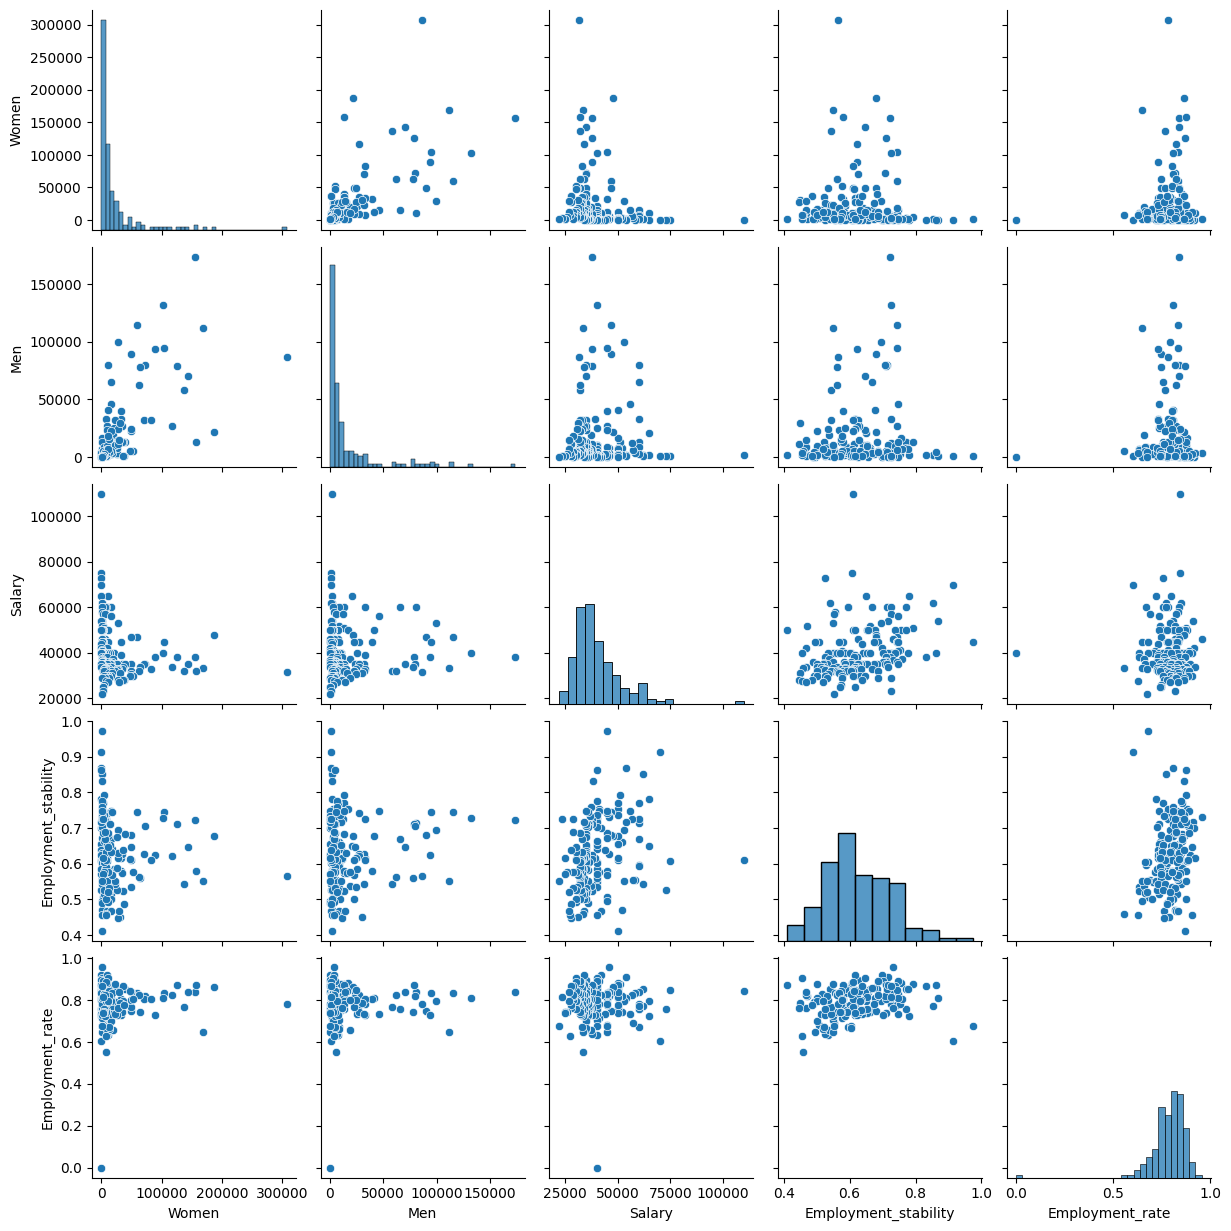

In [10]:
sns.pairplot(df[['Women','Men','Salary','Employment_stability','Employment_rate']])
plt.show

<div style="font-size: 30px">
        <a class="anchor" id="second-bullet"></a>
<span style="font-family:Bahnschrift">
<b><center><span style="color:green" > Let's remove unnecessary columns and clean null values </center></span>
    </div>

In [11]:
df=df.drop(['Major_code','P25th','P75th','Sample_size'],axis=1)
df.head()

Major    Total      Men    Women  \
Rank                                                                         
1                         PETROLEUM ENGINEERING   2339.0   2057.0    282.0   
2                MINING AND MINERAL ENGINEERING    756.0    679.0     77.0   
3                     METALLURGICAL ENGINEERING    856.0    725.0    131.0   
4     NAVAL ARCHITECTURE AND MARINE ENGINEERING   1258.0   1123.0    135.0   
5                          CHEMICAL ENGINEERING  32260.0  21239.0  11021.0   

     Major_category  ShareWomen  Employed  Full_time  Part_time  \
Rank                                                              
1       Engineering      0.1206      1976       1849        270   
2       Engineering      0.1019       640        556        170   
3       Engineering      0.1530       648        558        133   
4       Engineering      0.1073       758       1069        150   
5       Engineering      0.3416     25694      23170       5180   

      Full_time_year_round  Unemployed  Unemployment_rate  Salary  \
Rank                                                                
1                     1207          37             0.0184  110000   
2                      388          85             0.1172   75000   
3                      340          16             0.0241   73000   
4                      692          40             0.0501   70000   
5                    16697        1672             0.0611   65000   

      College_jobs  Non_college_jobs  Low_wage_jobs  ShareMen  \
Rank                                                            
1             1534               364            193    0.8794   
2              350               257             50    0.8981   
3              456               176              0    0.8470   
4              529               102              0    0.8927   
5            18314              4440            972    0.6584   

      Employment_rate  Employment_stability  
Rank                                         
1            0.844805              0.610830  
2            0.846561              0.606250  
3            0.757009              0.524691  
4            0.602544              0.912929  
5            0.796466              0.649840

In [12]:
df=df.fillna(df.median())
df.isna().sum()

C:\Users\Mahmoud Magdy\AppData\Local\Temp\ipykernel_10032\4289736729.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df=df.fillna(df.median())


Major                   0
Total                   0
Men                     0
Women                   0
Major_category          0
ShareWomen              0
Employed                0
Full_time               0
Part_time               0
Full_time_year_round    0
Unemployed              0
Unemployment_rate       0
Salary                  0
College_jobs            0
Non_college_jobs        0
Low_wage_jobs           0
ShareMen                0
Employment_rate         0
Employment_stability    0
dtype: int64

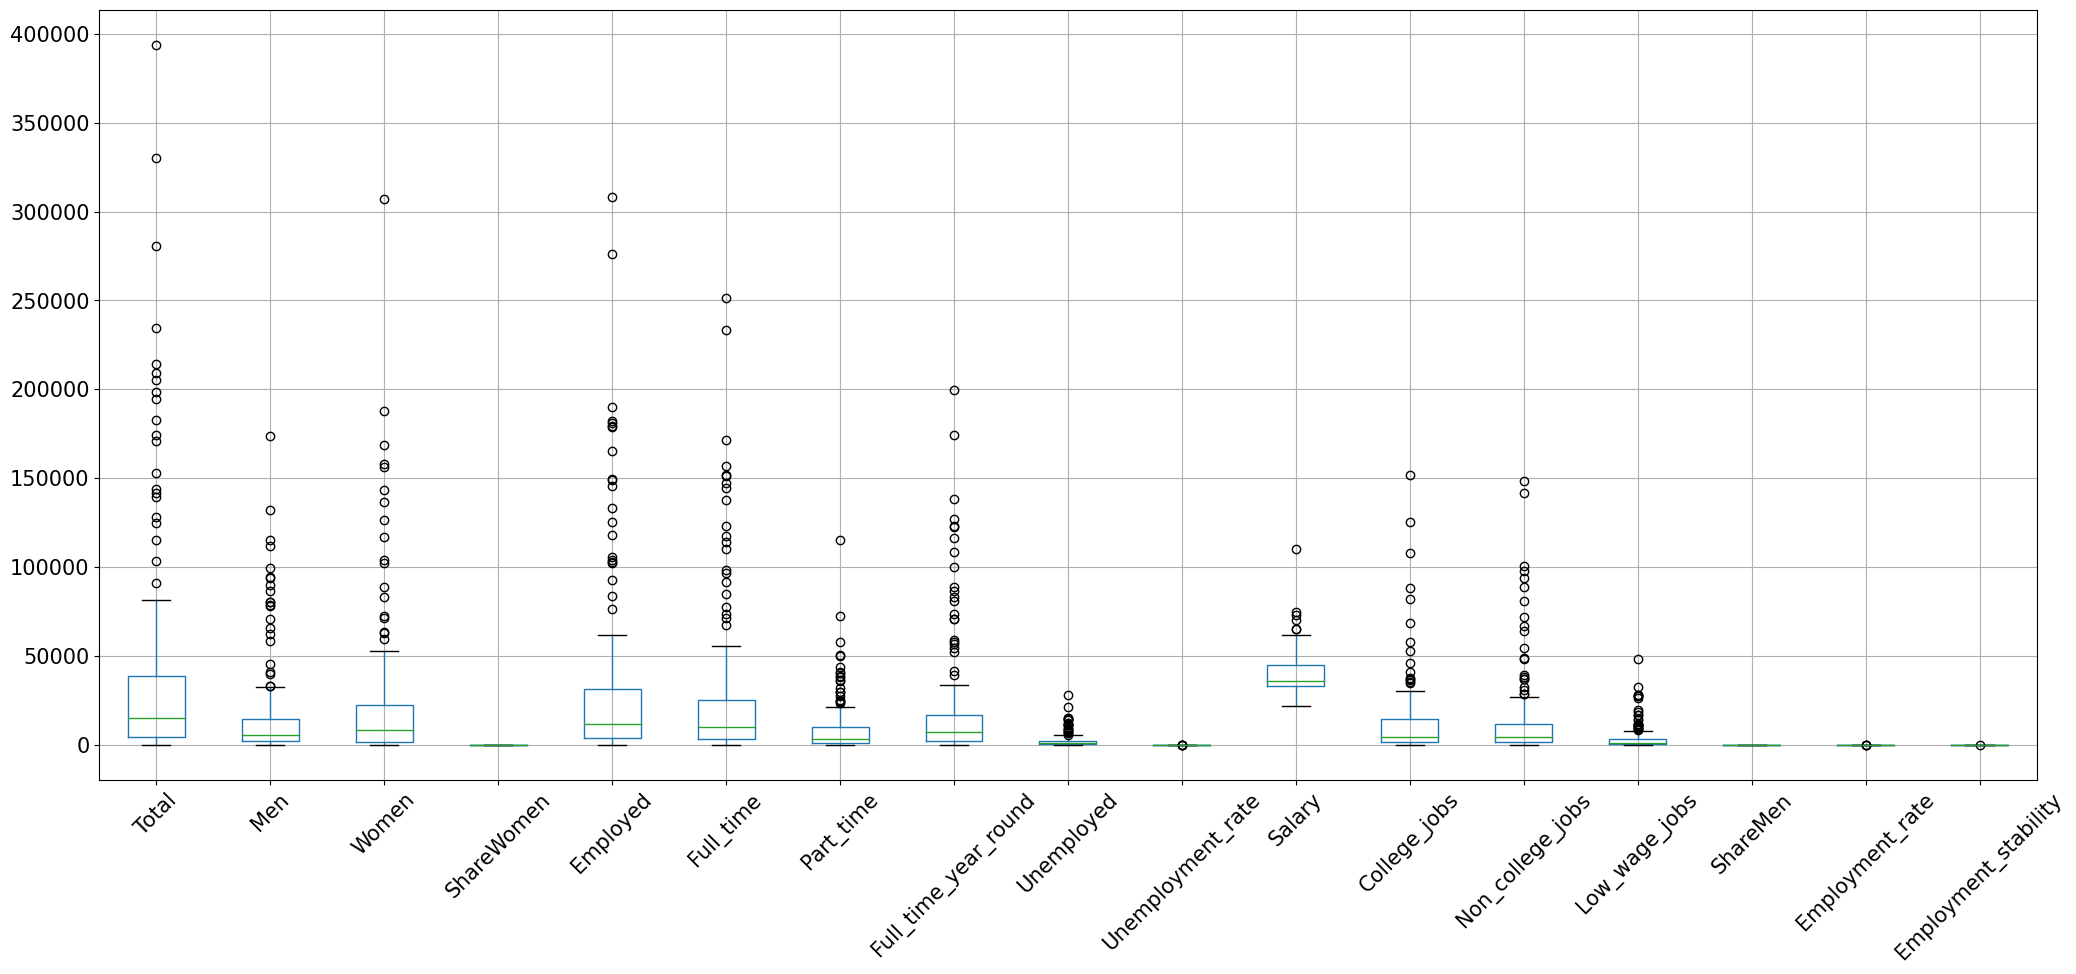

In [13]:
df.boxplot(figsize=(25,10),fontsize=15)
plt.xticks(rotation=45)
plt.show()

<div style="font-size: 35px">


<span style="font-family:Bahnschrift">


<b><center><span style="color:green" > Now let's do some visualizations to the data </center></span>
    </div>  <a class="anchor" id="third-bullet"></a>

In [14]:
print('Number of Majors',df.Major.unique().size)

Number of Majors 173


<h1 style='font-size: 25px;font-family:Bahnschrift SemiBold;color:blue;font-style:bold'> The number of majors is very big to be shown in a distribution so we will distribute the Major Category instead </h1>

In [15]:
fig=px.histogram(df,x='Major_category').update_xaxes(categoryorder='total descending')
fig.update_layout(
    autosize=True,height=700,
    title={
        'text': "Distribution of Major Categories by count of mention in the dataset",
        'y':0.96,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
font=dict(
        size=18
      
),title_font_color='darkorange')
fig.update_layout(

)
fig.update_xaxes(tickangle=90,title_font_family="Franklin Gothic Medium",title='Category of Major',title_font_color='green')
fig.update_yaxes(title_font_family="Franklin Gothic Medium",title='Count',title_font_color='green')

fig.show()

<h1 style='font-size: 33px;font-family:Bahnschrift SemiBold;color:#00696b;font-style:bold;text-align:'> What is the highest Major Category for each gender by number of graduates </h1>

In [16]:
men_by_major=df.groupby('Major_category')['Men'].sum()
men_by_major=men_by_major.sort_values(ascending=False)
men_by_major

Major_category
Business                               667852.0
Engineering                            408307.0
Humanities & Liberal Arts              272846.0
Social Science                         256834.0
Computers & Mathematics                208725.0
Biology & Life Science                 184919.0
Arts                                   134390.0
Communications & Journalism            131921.0
Industrial Arts & Consumer Services    103781.0
Education                              103526.0
Psychology & Social Work                98115.0
Physical Sciences                       95390.0
Law & Public Policy                     91129.0
Health                                  75517.0
Agriculture & Natural Resources         45791.0
Interdisciplinary                        2817.0
Name: Men, dtype: float64

In [17]:
women_by_major=df.groupby('Major_category')['Women'].sum()
women_by_major=women_by_major.sort_values(ascending=False)
women_by_major

Major_category
Business                               634524.0
Education                              455603.0
Humanities & Liberal Arts              440622.0
Health                                 387713.0
Psychology & Social Work               382892.0
Social Science                         273132.0
Biology & Life Science                 268943.0
Communications & Journalism            260680.0
Arts                                   222740.0
Engineering                            129276.0
Industrial Arts & Consumer Services    126011.0
Computers & Mathematics                 90283.0
Physical Sciences                       90089.0
Law & Public Policy                     87978.0
Agriculture & Natural Resources         43649.5
Interdisciplinary                        9479.0
Name: Women, dtype: float64

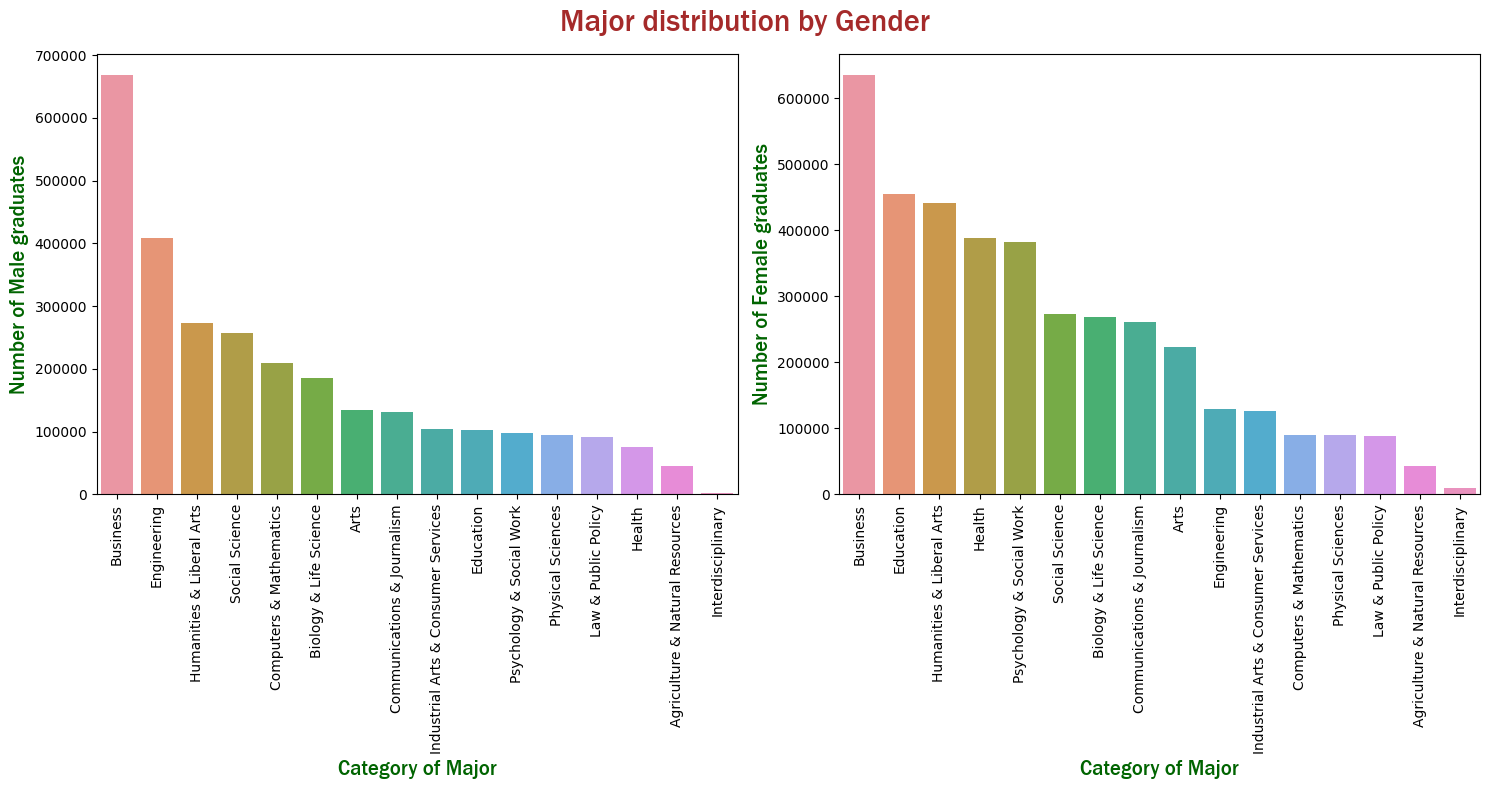

In [18]:
plt.figure(figsize=(15,8))
plt.subplot(121)
sns.barplot(x=men_by_major.index,y=men_by_major)
plt.xlabel('Category of Major',color='darkgreen',size=15,fontfamily='Franklin Gothic Medium')
plt.ylabel('Number of Male graduates',color='darkgreen',size=15,fontfamily='Franklin Gothic Medium')
plt.xticks(rotation=90)

plt.subplot(122)
sns.barplot(x=women_by_major.index,y=women_by_major)
plt.xlabel('Category of Major',color='darkgreen',size=15,fontfamily='Franklin Gothic Medium')
plt.ylabel('Number of Female graduates',color='darkgreen',size=15,fontfamily='Franklin Gothic Medium')
plt.xticks(rotation=90)
plt.suptitle('Major distribution by Gender',size=22,color='brown',fontweight='1000',font='Franklin Gothic Medium',)
plt.tight_layout()
plt.show()

<h1 style="font-size: 30px;font-family:Bahnschrift SemiBold;color:blue"> We notice the following: </h1> </b>
<ol>
 <li style="font-size: 18px;font-family:Bahnschrift">Business is the Major Category with most graduates for both genders.</li>
 <li style="font-size: 18px;font-family:Bahnschrift">The other popular Major Categories after business varies for each gender. </li>
 <li style="font-size: 18px;font-family:Bahnschrift">The 5 least popular Categories are common the same for each gender except for Health which is very unpopular in Men but is the 4th most popular Major Category for Women </li>
</ol>

In [19]:
top5_cats=df.groupby('Major_category')['Total'].sum()
top5_cats=top5_cats.nlargest(5)
top5_cats

Major_category
Business                     1302376.0
Humanities & Liberal Arts     713468.0
Education                     559129.0
Engineering                   537583.0
Social Science                529966.0
Name: Total, dtype: float64

In [20]:
total_by_major=df.groupby('Major_category')[['ShareMen','ShareWomen']].mean()
#total_by_major=total_by_major.sort_values(ascending=False)
total_by_major= total_by_major.loc[top5_cats.index]
total_by_major

ShareMen  ShareWomen
Major_category                                 
Business                   0.516800    0.483200
Humanities & Liberal Arts  0.368213    0.631787
Education                  0.251494    0.748506
Engineering                0.761107    0.238893
Social Science             0.446033    0.553967

In [21]:
dfm = total_by_major.melt(ignore_index=False).reset_index()
dfm.value=pd.to_numeric(dfm.value*100)
dfm['perc']=dfm.value.apply(lambda x: str(np.round(x,2))+ '%')
dfm

Major_category    variable      value    perc
0                   Business    ShareMen  51.680000  51.68%
1  Humanities & Liberal Arts    ShareMen  36.821333  36.82%
2                  Education    ShareMen  25.149375  25.15%
3                Engineering    ShareMen  76.110690  76.11%
4             Social Science    ShareMen  44.603333   44.6%
5                   Business  ShareWomen  48.320000  48.32%
6  Humanities & Liberal Arts  ShareWomen  63.178667  63.18%
7                  Education  ShareWomen  74.850625  74.85%
8                Engineering  ShareWomen  23.889310  23.89%
9             Social Science  ShareWomen  55.396667   55.4%

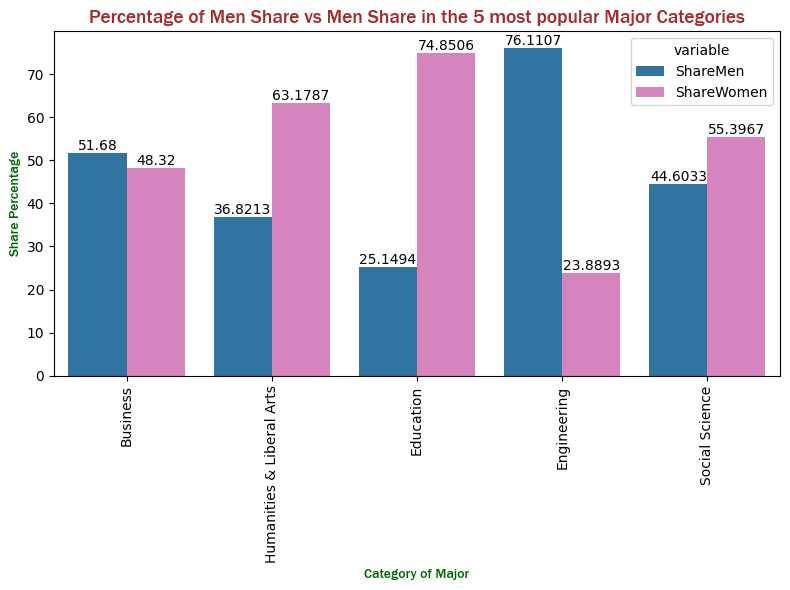

In [22]:
plt.figure(figsize=(8,6))
palette = ['tab:blue', 'tab:pink']

plt.title('Percentage of Men Share vs Men Share in the 5 most popular Major Categories',color='brown',fontweight='1000',font='Franklin Gothic Medium',fontsize=14)
ax=sns.barplot(data=dfm,x=dfm.Major_category,y=dfm.value,hue='variable', palette=palette)
plt.xticks(rotation=90)
for i in ax.containers:
    ax.bar_label(i)
plt.xlabel('Category of Major',color='darkgreen',font='Franklin Gothic Medium',fontweight='700')
plt.ylabel('Share Percentage',color='darkgreen',font='Franklin Gothic Medium',fontweight='700')
plt.tight_layout()
plt.show()

<h1 style="font-size: 30px;font-family:Bahnschrift SemiBold;color:blue"> We notice the following: </h1> </b>
<ol>
 <li style="font-size: 18px;font-family:Bahnschrift">Business and Social Science have almost equal distribution of the 2 Genders.</li>
 <li style="font-size: 18px;font-family:Bahnschrift">Engineering is vastly dominated by Men with 76% percent share. </li>
 <li style="font-size: 18px;font-family:Bahnschrift">Education and Humanities & Liberal Arts are vastly dominated by Women with 74%,64% percent share respectively. </li>
</ol>

<h1 style='font-size: 28px;font-family:Bahnschrift SemiBold;color:#00696b;font-style:bold;text-align:'> Now lets see the Distrubition of The Majors for Business for each Gender since it's the most popular Major category in each gender </h1>

In [23]:
df_bus_men=df[df.eq('Business').any(1)]
df_bus_men=df_bus_men.loc[:,['Major','Men']]
#df_bus_men=df_bus_men.sort_values(by='Men',ascending=False)
df_bus_men.nlargest(20,'Men')

C:\Users\Mahmoud Magdy\AppData\Local\Temp\ipykernel_10032\4029153050.py:1: FutureWarning:

In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.



Major       Men
Rank                                                           
77             BUSINESS MANAGEMENT AND ADMINISTRATION  173809.0
58                                   GENERAL BUSINESS  132238.0
36                                            FINANCE  115030.0
41                                         ACCOUNTING   94519.0
78                   MARKETING AND MARKETING RESEARCH   78857.0
128                            HOSPITALITY MANAGEMENT   15204.0
25      MANAGEMENT INFORMATION SYSTEMS AND STATISTICS   13496.0
60                             INTERNATIONAL BUSINESS   10624.0
63    MISCELLANEOUS BUSINESS & MEDICAL ADMINISTRATION   10285.0
28                OPERATIONS LOGISTICS AND E-COMMERCE    7921.0
38                                 BUSINESS ECONOMICS    7575.0
87           HUMAN RESOURCES AND PERSONNEL MANAGEMENT    6184.0
7                                   ACTUARIAL SCIENCE    2110.0

In [24]:
df_bus_women=df[df.eq('Business').any(1)]
df_bus_women=df_bus_women.loc[:,['Major','Women']]
#df_bus_women=df_bus_women.sort_values(by='Women',ascending=False)
df_bus_women.nlargest(20,'Women')

C:\Users\Mahmoud Magdy\AppData\Local\Temp\ipykernel_10032\1562407473.py:1: FutureWarning:

In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.



Major     Women
Rank                                                           
77             BUSINESS MANAGEMENT AND ADMINISTRATION  156118.0
78                   MARKETING AND MARKETING RESEARCH  126354.0
41                                         ACCOUNTING  104114.0
58                                   GENERAL BUSINESS  102352.0
36                                            FINANCE   59476.0
128                            HOSPITALITY MANAGEMENT   28443.0
87           HUMAN RESOURCES AND PERSONNEL MANAGEMENT   18313.0
60                             INTERNATIONAL BUSINESS   15270.0
63    MISCELLANEOUS BUSINESS & MEDICAL ADMINISTRATION    7662.0
38                                 BUSINESS ECONOMICS    5727.0
25      MANAGEMENT INFORMATION SYSTEMS AND STATISTICS    5217.0
28                OPERATIONS LOGISTICS AND E-COMMERCE    3811.0
7                                   ACTUARIAL SCIENCE    1667.0

In [25]:
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=df_bus_men.nlargest(20,'Men').Major, values=df_bus_men.nlargest(20,'Men').Men,title='Men'),
              1, 1)
fig.add_trace(go.Pie(labels=df_bus_women.nlargest(20,'Women').Major, values=df_bus_women.nlargest(20,'Women').Women,title='Women'),
              1, 2)

fig.update_layout(margin = dict(t=100, l=0, r=0, b=0),title='Distribution of Majors in Business Category for each Gender',legend_borderwidth=1,font=dict(
        size=15,family='Franklin Gothic Medium'))
fig.show()

<h1 style="font-size: 30px;font-family:Bahnschrift SemiBold;color:blue"> We notice the following: </h1> </b>
<ol>
 <li style="font-size: 18px;font-family:Bahnschrift">BUSINESS MANAGEMENT AND ADMINISTRATION is the most dominating major for both gender occupying 25% of the total number of people with Business Major.</li>
 <li style="font-size: 18px;font-family:Bahnschrift">Actural Science is the least popular major for both genders with less than 1% share. </li>

</ol>

In [26]:
df.groupby('Major_category')['Salary'].mean().nlargest(10)

Major_category
Engineering                            57382.758621
Business                               43538.461538
Computers & Mathematics                42745.454545
Law & Public Policy                    42200.000000
Physical Sciences                      41890.000000
Social Science                         37344.444444
Agriculture & Natural Resources        36900.000000
Health                                 36825.000000
Biology & Life Science                 36421.428571
Industrial Arts & Consumer Services    36342.857143
Name: Salary, dtype: float64

<h1 style='font-size: 33px;font-family:Bahnschrift SemiBold;color:#00696b;font-style:bold;text-align:'> What about the salaries? </h1>

<h1 style='font-size: 28px;font-family:Bahnschrift SemiBold;color:#00700b;font-style:bold;text-align:'> Let's see first if the salaries are normally distrubted or not </h1>

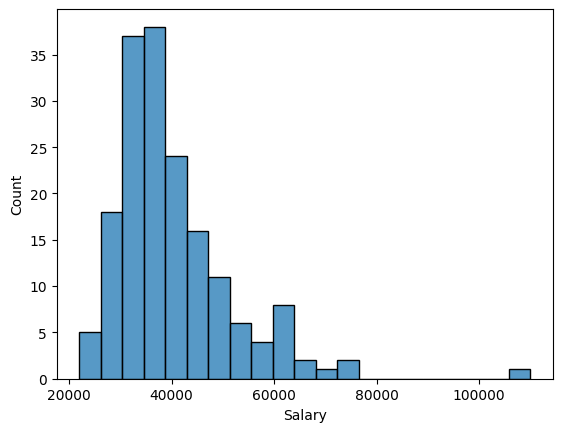

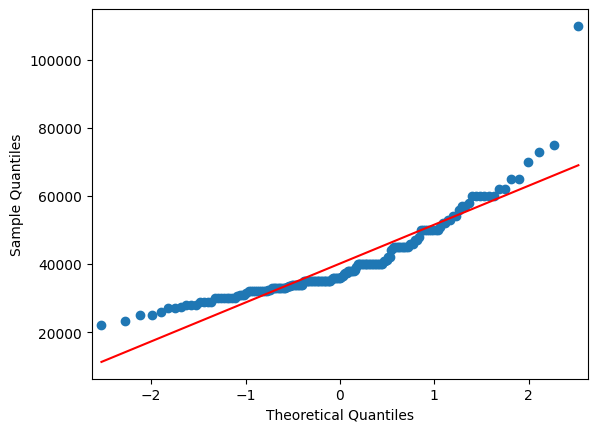

Skewness Value 2.036867702243609


In [27]:
sns.histplot((df.Salary))
sm.qqplot((df.Salary),line='s')
plt.show()
print('Skewness Value',df.Salary.skew())

<h1 style='font-size: 25px;font-family:Bahnschrift SemiBold;color:#00696b;font-style:bold;text-align:'> It looks Right Skewed </h1>

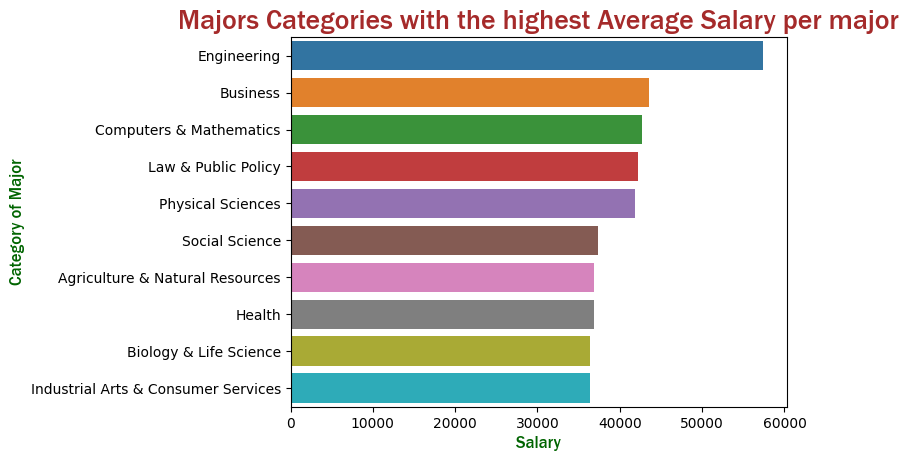

In [28]:
sns.barplot(x=df.groupby('Major_category')['Salary'].mean().nlargest(10).values,y=df.groupby('Major_category')['Salary'].mean().nlargest(10).index,orient='h')
plt.xlabel('Salary',color='darkgreen',fontweight='700',font='Franklin Gothic Medium',fontsize=12)
plt.ylabel('Category of Major',color='darkgreen',fontweight='700',font='Franklin Gothic Medium',fontsize=12)


plt.title('Majors Categories with the highest Average Salary per major',color='brown',fontweight='1000',font='Franklin Gothic Medium',fontsize=20)
plt.show()

In [29]:
df[['Major','Salary']].nlargest(10,'Salary')

Major  Salary
Rank                                                   
1                         PETROLEUM ENGINEERING  110000
2                MINING AND MINERAL ENGINEERING   75000
3                     METALLURGICAL ENGINEERING   73000
4     NAVAL ARCHITECTURE AND MARINE ENGINEERING   70000
5                          CHEMICAL ENGINEERING   65000
6                           NUCLEAR ENGINEERING   65000
7                             ACTUARIAL SCIENCE   62000
8                    ASTRONOMY AND ASTROPHYSICS   62000
9                        MECHANICAL ENGINEERING   60000
10                       ELECTRICAL ENGINEERING   60000

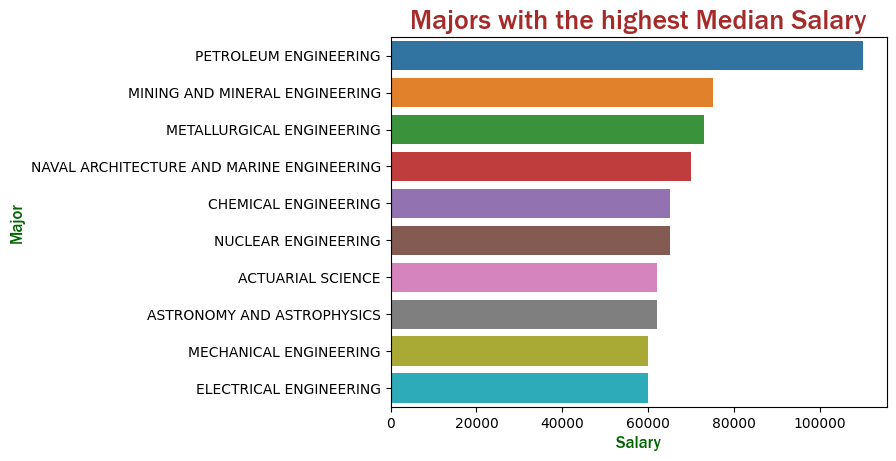

In [30]:
sns.barplot(x=df.nlargest(10,'Salary').Salary,y=df.nlargest(10,'Salary').Major,orient='h')
#plt.xticks(rotation=90)
plt.xlabel('Salary',color='darkgreen',fontweight='700',font='Franklin Gothic Medium',fontsize=12)
plt.ylabel('Major',color='darkgreen',fontweight='700',font='Franklin Gothic Medium',fontsize=12)
plt.title('Majors with the highest Median Salary',color='brown',fontweight='1000',font='Franklin Gothic Medium',fontsize=20)
plt.show()

<h1 style="font-size: 25px;font-family:Bahnschrift SemiBold;color:blue"> We notice some 2 insights here: </h1> </b>
<ol>
 <li style="font-size: 17px;font-family:Bahnschrift">Almost all of the most paid majors belong to the Engineering category</li>
 <li style="font-size: 17px;font-family:Bahnschrift">Acturial Science Major is one of the top 10 paid majors despite only sharing less than 1% of the total business graduates </li>
</ol>

<h1 style='font-size: 35px;font-family:Bahnschrift SemiBold;color:#00696b;font-style:bold;text-align:'> Let's see the distrubtion of salary for all Majors </h1>

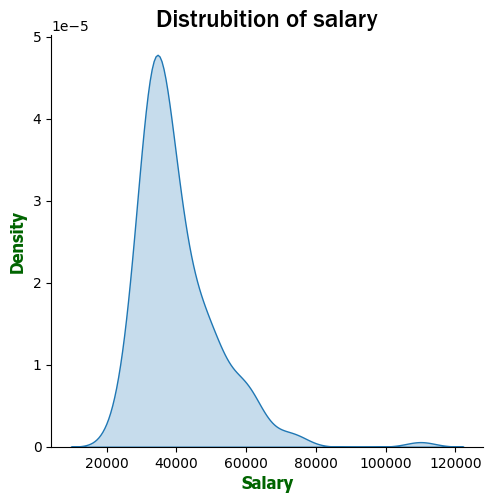

In [31]:
sns.displot(df, x="Salary", kind="kde",fill=True)
plt.title('Distrubition of salary',font='Franklin Gothic Medium',fontsize=18)
plt.xlabel('Salary',color='darkgreen',fontweight='700',font='Tahoma',fontsize=12)
plt.ylabel('Density',color='darkgreen',fontweight='700',font='Tahoma',fontsize=12)
plt.show()

In [32]:
fig=px.violin(df.Salary)
fig.update_layout(title='Distribution of Salary for all Majors',font=dict(
        size=15,family='Franklin Gothic Medium'))
fig.update_xaxes(tickangle=90,title_font_family="Franklin Gothic Medium",title='Category of Major',title_font_color='green')
fig.update_yaxes(title_font_family="Franklin Gothic Medium",title='Salary',title_font_color='green')
fig.show()

<h1 style="font-size: 27px;font-family:Bahnschrift SemiBold;color:blue"> Salaries of most Majors lie between 26k and 55k USD with very few Majors exceeding 60k </h1> </b>

<h1 style="font-size: 23px;font-family:Bahnschrift SemiBold;color:blue"> These are the Majors with median salaries bigger than or equal 60k USD : </h1> </b>


In [33]:
print('Percentage of Majors with Median Salary >= 60k USD: ' + str(np.round((df[df.Salary>=60000].shape[0]/df.Major.shape[0]),3)*100) + '%' )
df[df.Salary>=60000]

Percentage of Majors with Median Salary >= 60k USD: 8.1%


Major    Total      Men    Women  \
Rank                                                                         
1                         PETROLEUM ENGINEERING   2339.0   2057.0    282.0   
2                MINING AND MINERAL ENGINEERING    756.0    679.0     77.0   
3                     METALLURGICAL ENGINEERING    856.0    725.0    131.0   
4     NAVAL ARCHITECTURE AND MARINE ENGINEERING   1258.0   1123.0    135.0   
5                          CHEMICAL ENGINEERING  32260.0  21239.0  11021.0   
6                           NUCLEAR ENGINEERING   2573.0   2200.0    373.0   
7                             ACTUARIAL SCIENCE   3777.0   2110.0   1667.0   
8                    ASTRONOMY AND ASTROPHYSICS   1792.0    832.0    960.0   
9                        MECHANICAL ENGINEERING  91227.0  80320.0  10907.0   
10                       ELECTRICAL ENGINEERING  81527.0  65511.0  16016.0   
11                         COMPUTER ENGINEERING  41542.0  33258.0   8284.0   
12                        AEROSPACE ENGINEERING  15058.0  12953.0   2105.0   
13                       BIOMEDICAL ENGINEERING  14955.0   8407.0   6548.0   
14                            MATERIALS SCIENCE   4279.0   2949.0   1330.0   

         Major_category  ShareWomen  Employed  Full_time  Part_time  \
Rank                                                                  
1           Engineering      0.1206      1976       1849        270   
2           Engineering      0.1019       640        556        170   
3           Engineering      0.1530       648        558        133   
4           Engineering      0.1073       758       1069        150   
5           Engineering      0.3416     25694      23170       5180   
6           Engineering      0.1450      1857       2038        264   
7              Business      0.4414      2912       2924        296   
8     Physical Sciences      0.5357      1526       1085        553   
9           Engineering      0.1196     76442      71298      13101   
10          Engineering      0.1965     61928      55450      12695   
11          Engineering      0.1994     32506      30315       5146   
12          Engineering      0.1398     11391      11106       2724   
13          Engineering      0.4378     10047       9017       2694   
14          Engineering      0.3108      3307       2751        878   

      Full_time_year_round  Unemployed  Unemployment_rate  Salary  \
Rank                                                                
1                     1207          37             0.0184  110000   
2                      388          85             0.1172   75000   
3                      340          16             0.0241   73000   
4                      692          40             0.0501   70000   
5                    16697        1672             0.0611   65000   
6                     1449         400             0.1772   65000   
7                     2482         308             0.0957   62000   
8                      827          33             0.0212   62000   
9                    54639        4650             0.0573   60000   
10                   41413        3895             0.0592   60000   
11                   23621        2275             0.0654   60000   
12                    8790         794             0.0652   60000   
13                    5986        1019             0.0921   60000   
14                    1967          78             0.0230   60000   

      College_jobs  Non_college_jobs  Low_wage_jobs  ShareMen  \
Rank                                                            
1             1534               364            193    0.8794   
2              350               257             50    0.8981   
3              456               176              0    0.8470   
4              529               102              0    0.8927   
5            18314              4440            972    0.6584   
6             1142               657            244    0.8550   
7             1768             

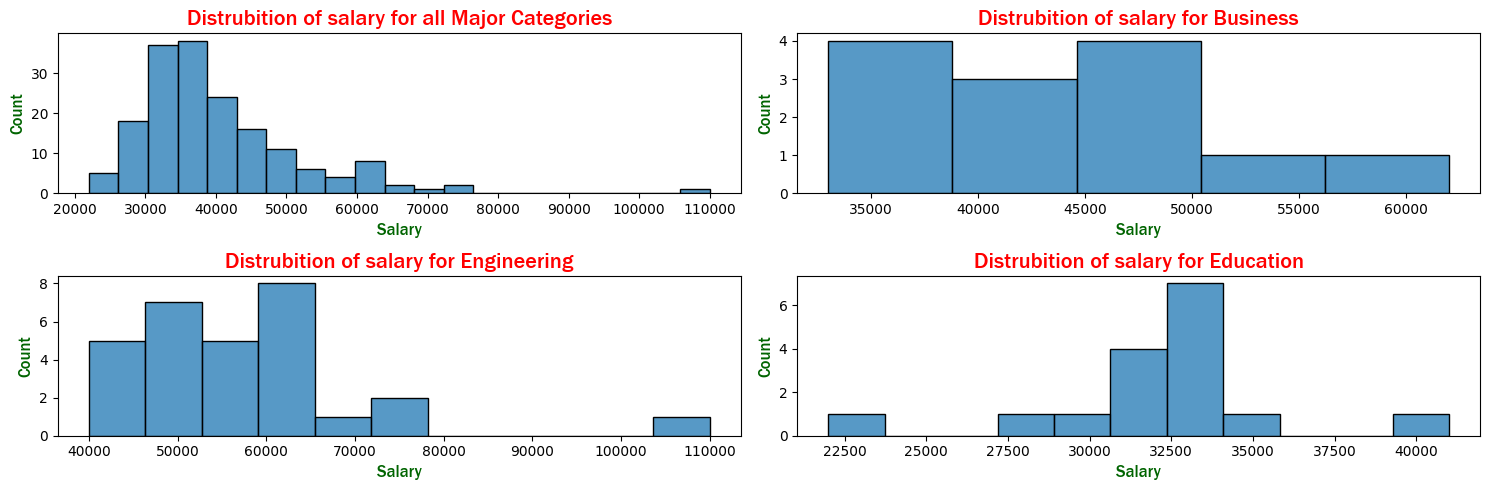

In [34]:
plt.figure(figsize=(15,5))
plt.subplot(221)
sns.histplot(df.Salary)
plt.xlabel('Salary',color='darkgreen',fontweight='700',font='Franklin Gothic Medium',fontsize=12)
plt.ylabel('Count',color='darkgreen',fontweight='700',font='Franklin Gothic Medium',fontsize=12)
plt.title('Distrubition of salary for all Major Categories',font='Franklin Gothic Medium',fontsize=16,color='red')
plt.locator_params ('x', nbins = 10)

plt.subplot(222)
plt.title('Distrubition of salary for Business',font='Franklin Gothic Medium',fontsize=16,color='red')
sns.histplot(df.Salary.loc[df.Major_category=='Business'])
plt.xlabel('Salary',color='darkgreen',fontweight='700',font='Franklin Gothic Medium',fontsize=12)
plt.ylabel('Count',color='darkgreen',fontweight='700',font='Franklin Gothic Medium',fontsize=12)
plt.locator_params ('x', nbins = 10)

plt.subplot(223)
plt.title('Distrubition of salary for Engineering',font='Franklin Gothic Medium',fontsize=16,color='red')
sns.histplot(df.Salary.loc[df.Major_category=='Engineering'])
plt.xlabel('Salary',color='darkgreen',fontweight='700',font='Franklin Gothic Medium',fontsize=12)
plt.ylabel('Count',color='darkgreen',fontweight='700',font='Franklin Gothic Medium',fontsize=12)
plt.locator_params ('x', nbins = 10)

plt.subplot(224)
plt.title('Distrubition of salary for Education',font='Franklin Gothic Medium',fontsize=16,color='red')
sns.histplot(df.Salary.loc[df.Major_category=='Education'])
plt.xlabel('Salary',color='darkgreen',fontweight='700',font='Franklin Gothic Medium',fontsize=12)
plt.ylabel('Count',color='darkgreen',fontweight='700',font='Franklin Gothic Medium',fontsize=12)
plt.locator_params ('x', nbins = 10)
plt.tight_layout()
plt.show()

In [35]:
fig.update_layout(title='Distribution of Salary for all Majors',font=dict(
        size=15,family='Franklin Gothic Medium'))
fig.update_xaxes(tickangle=90,title_font_family="Franklin Gothic Medium",title='Category of Major',title_font_color='green')
fig.update_yaxes(title_font_family="Franklin Gothic Medium",title='Salary',title_font_color='green')
fig.show()

In [36]:
box_df=df.nlargest(10,'Salary')
box_df

Major    Total      Men    Women  \
Rank                                                                         
1                         PETROLEUM ENGINEERING   2339.0   2057.0    282.0   
2                MINING AND MINERAL ENGINEERING    756.0    679.0     77.0   
3                     METALLURGICAL ENGINEERING    856.0    725.0    131.0   
4     NAVAL ARCHITECTURE AND MARINE ENGINEERING   1258.0   1123.0    135.0   
5                          CHEMICAL ENGINEERING  32260.0  21239.0  11021.0   
6                           NUCLEAR ENGINEERING   2573.0   2200.0    373.0   
7                             ACTUARIAL SCIENCE   3777.0   2110.0   1667.0   
8                    ASTRONOMY AND ASTROPHYSICS   1792.0    832.0    960.0   
9                        MECHANICAL ENGINEERING  91227.0  80320.0  10907.0   
10                       ELECTRICAL ENGINEERING  81527.0  65511.0  16016.0   

         Major_category  ShareWomen  Employed  Full_time  Part_time  \
Rank                                                                  
1           Engineering      0.1206      1976       1849        270   
2           Engineering      0.1019       640        556        170   
3           Engineering      0.1530       648        558        133   
4           Engineering      0.1073       758       1069        150   
5           Engineering      0.3416     25694      23170       5180   
6           Engineering      0.1450      1857       2038        264   
7              Business      0.4414      2912       2924        296   
8     Physical Sciences      0.5357      1526       1085        553   
9           Engineering      0.1196     76442      71298      13101   
10          Engineering      0.1965     61928      55450      12695   

      Full_time_year_round  Unemployed  Unemployment_rate  Salary  \
Rank                                                                
1                     1207          37             0.0184  110000   
2                      388          85             0.1172   75000   
3                      340          16             0.0241   73000   
4                      692          40             0.0501   70000   
5                    16697        1672             0.0611   65000   
6                     1449         400             0.1772   65000   
7                     2482         308             0.0957   62000   
8                      827          33             0.0212   62000   
9                    54639        4650             0.0573   60000   
10                   41413        3895             0.0592   60000   

      College_jobs  Non_college_jobs  Low_wage_jobs  ShareMen  \
Rank                                                            
1             1534               364            193    0.8794   
2              350               257             50    0.8981   
3              456               176              0    0.8470   
4              529               102              0    0.8927   
5            18314              4440            972    0.6584   
6             1142               657            244    0.8550   
7             1768               314            259    0.5586   
8              972               500            220    0.4643   
9            52844             16384           3253    0.8804   
10           45829             10874           3170    0.8035   

      Employment_rate  Employment_stability  
Rank                                         
1            0.844805              0.610830  
2            0.846561              0.606250  
3            0.757009              0.524691  
4            0.602544              0.912929  
5            0.796466              0.649840  
6            0.721726              0.780291  
7            0.770982              0.852335  
8            0.851562              0.541940  
9            0.837932              0.714777  
10           0.759601              0.668728

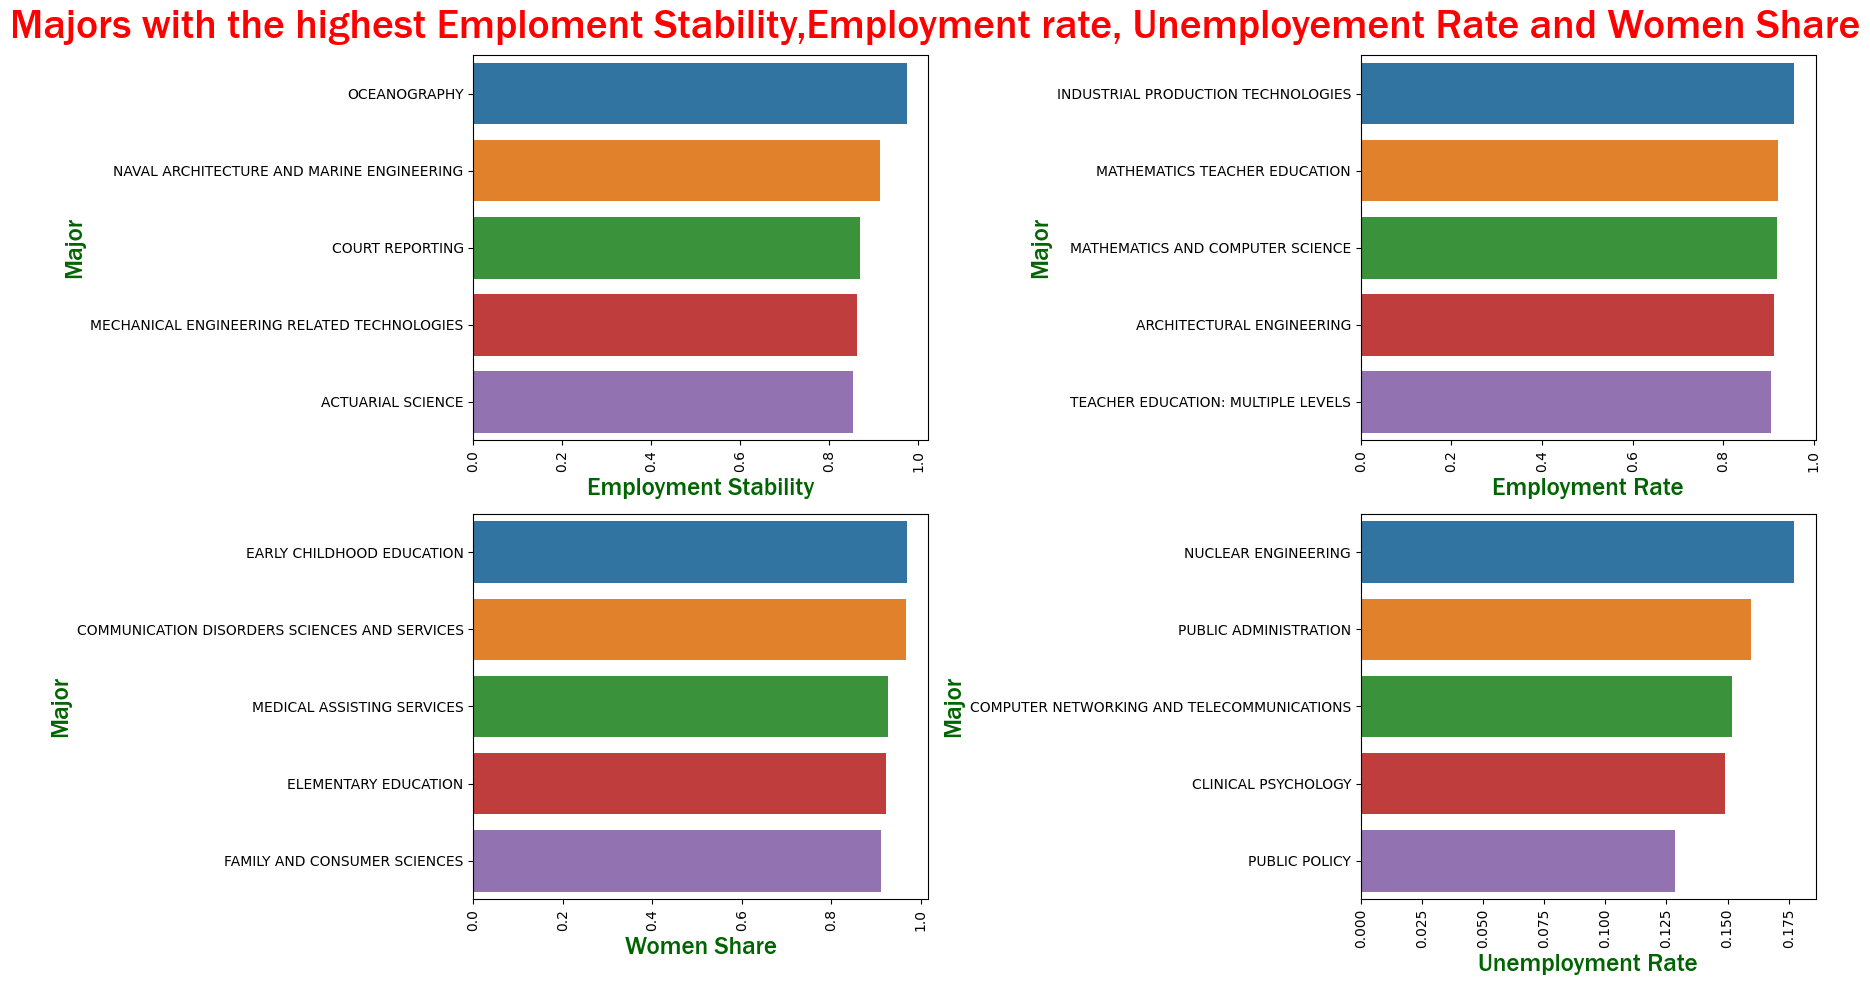

In [37]:
plt.figure(figsize=(18,10))
plt.subplot(221)
sns.barplot(x=df.nlargest(5,'Employment_stability').Employment_stability,y=df.nlargest(5,'Employment_stability').Major,orient='h')
plt.xlabel('Employment Stability',color='darkgreen',fontweight='700',font='Franklin Gothic Medium',fontsize=18)
plt.ylabel('Major',color='darkgreen',fontweight='700',font='Franklin Gothic Medium',fontsize=18)
plt.xticks(rotation=90)

plt.subplot(222)
sns.barplot(x=df.nlargest(5,'Employment_rate').Employment_rate,y=df.nlargest(5,'Employment_rate').Major,orient='h')
plt.xlabel('Employment Rate',color='darkgreen',fontweight='700',font='Franklin Gothic Medium',fontsize=18)
plt.ylabel('Major',color='darkgreen',fontweight='700',font='Franklin Gothic Medium',fontsize=18)
plt.xticks(rotation=90)

plt.subplot(223)
sns.barplot(x=df.nlargest(5,'ShareWomen').ShareWomen,y=df.nlargest(5,'ShareWomen').Major,orient='h')
plt.xlabel('Women Share',color='darkgreen',fontweight='700',font='Franklin Gothic Medium',fontsize=18)
plt.ylabel('Major',color='darkgreen',fontweight='700',font='Franklin Gothic Medium',fontsize=18)
plt.xticks(rotation=90)

plt.subplot(224)
sns.barplot(x=df.nlargest(5,'Unemployment_rate').Unemployment_rate,y=df.nlargest(5,'Unemployment_rate').Major,orient='h')
plt.xlabel('Unemployment Rate',color='darkgreen',fontweight='700',font='Franklin Gothic Medium',fontsize=18)
plt.ylabel('Major',color='darkgreen',fontweight='700',font='Franklin Gothic Medium',fontsize=18)
plt.xticks(rotation=90)
plt.ylabel('Major',color='darkgreen',fontweight='700',font='Franklin Gothic Medium',fontsize=18)
plt.suptitle('Majors with the highest Emploment Stability,Employment rate, Unemployement Rate and Women Share',font='Franklin Gothic Medium',fontsize=30,color='red')
plt.tight_layout()
plt.show()

<h1 style='font-size: 28px;font-family:Bahnschrift SemiBold;color:#00696b;font-style:bold;text-align:'> let's see correlation but only high ones bigger than 0.85 </h1>

C:\Users\Mahmoud Magdy\AppData\Local\Temp\ipykernel_10032\2276293347.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



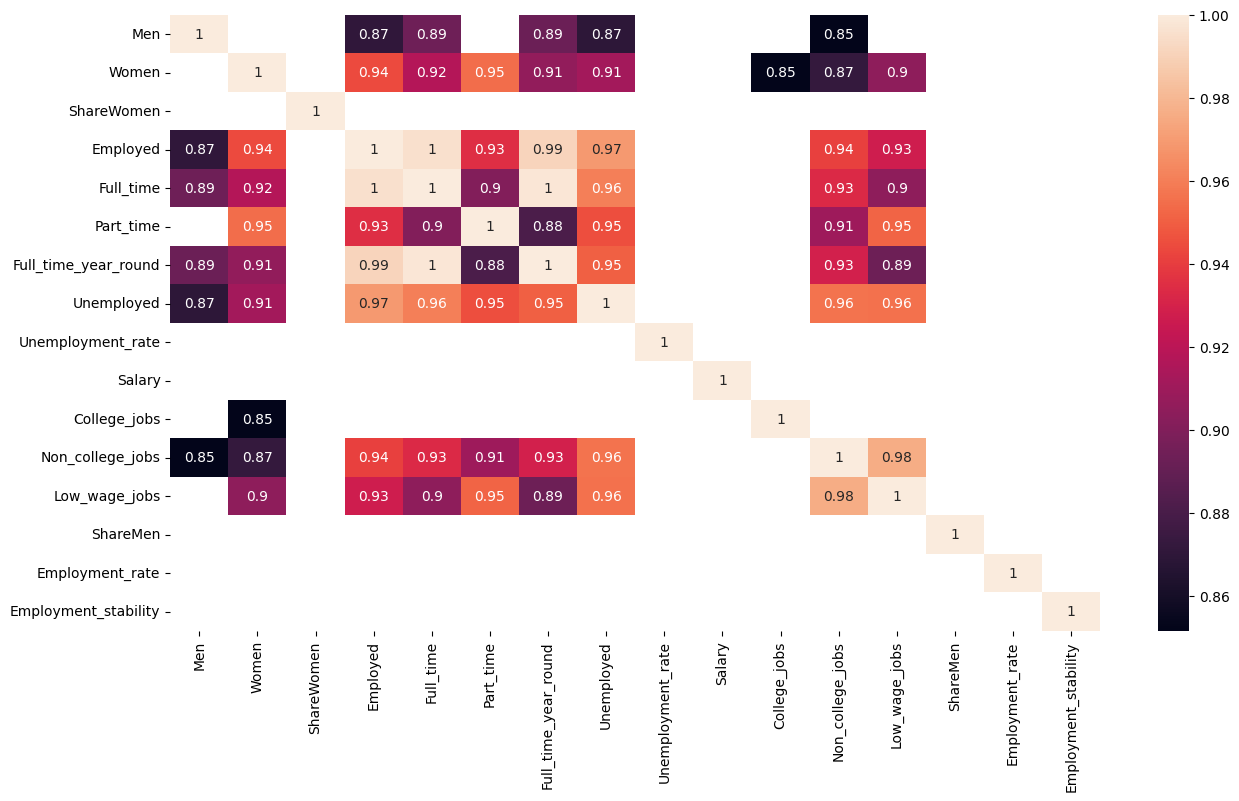

In [38]:

plt.figure(figsize = (15, 8))
corr=df.drop('Total',axis=1).corr()
corr=corr[corr>0.85]
sns.heatmap(corr,annot=True)
plt.show()

<h1 style='font-size: 30px;font-family:Bahnschrift SemiBold;color:#00696b;font-style:bold;text-align:'> We notice that there is high correlation with low wage jobs and jobs that doesnt require college major but let's confirm with a regression plot </h1>

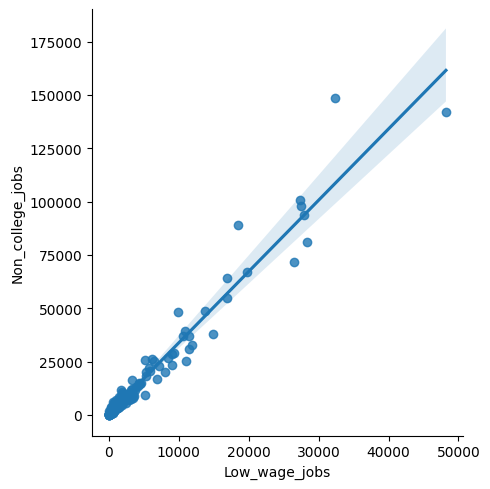

In [39]:
sns.lmplot(data= df,x='Low_wage_jobs',y='Non_college_jobs')
plt.show()

<h1 style="font-size: 25px;font-family:Bahnschrift SemiBold;color:blue"> Regression plot confirmed that there is indeed a high correlation between low wage jobs and jobs that doesnt require college major </h1> </b>

<h1 style='font-size: 30px;font-family:Bahnschrift SemiBold;color:#00696b;font-style:bold;text-align:'> Here are some of the other most strong correlations </h1>

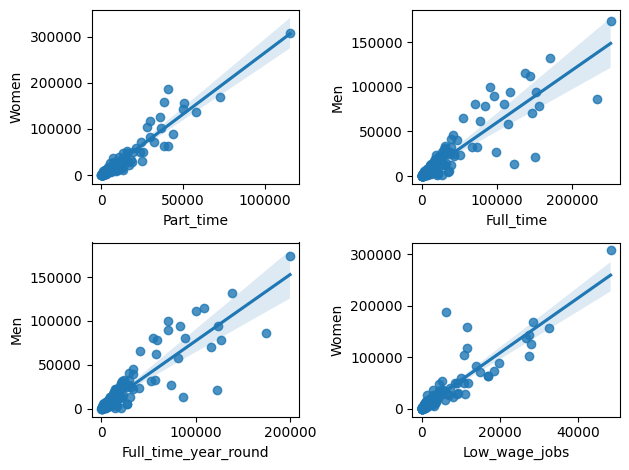

In [40]:
plt.subplot(2,2,1)
sns.regplot(x=df.Part_time,y=df.Women)
plt.subplot(2,2,2)
sns.regplot(x=df.Full_time,y=df.Men)
plt.subplot(2,2,3)
sns.regplot(x=df.Full_time_year_round,y=df.Men)
plt.subplot(2,2,4)
sns.regplot(x=df.Low_wage_jobs,y=df.Women)
plt.tight_layout()
plt.show()

<h1 style="font-size: 30px;font-family:Bahnschrift SemiBold;color:blue"> We notice the following: </h1> </b>
<ol>
 <li style="font-size: 18px;font-family:Bahnschrift">There is a higher correlation between Men and working Full Time or Full time Round (0.89) in contast to a lower correlation with working Part Time</li>
 <li style="font-size: 18px;font-family:Bahnschrift">Women on the other hand have high correlation with working Full Time, Full Time Round and Part Time</li>
 <li style="font-size: 18px;font-family:Bahnschrift">There is a high correlation between Women and working in Low Wage jobs in contrast to Men which makes sense because Men tend to look more for high wage jobs</li>
</ol>

### Return to [top](#id)
